In [1]:
import cvxpy as cp
import numpy as np

import networkx as nx

# Max-cut

In [2]:
def get_graph(graph_type):
    if graph_type == 0:
        G = nx.complete_graph(5)
        pos = nx.shell_layout(G)
        nx.draw(G, pos, with_labels = True)
    elif graph_type == 1:
        G = nx.turan_graph(5,3)
        pos = nx.multipartite_layout(G)
        nx.draw(G, pos, with_labels = True)
    else:
        return None
    for u,v,d in G.edges(data=True):
        d['weight'] = np.abs(u - v)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    return G

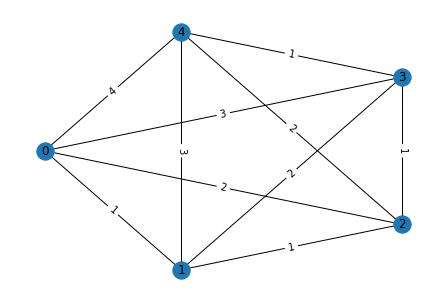

In [3]:
graph_type = 0
G = get_graph(graph_type)

In [19]:
from networkx.algorithms.approximation import maxcut
maxcut.one_exchange(G, weight="weight")

(15, ({0, 1}, {2, 3, 4}))

In [7]:
n = len(G)

L_orig = nx.laplacian_matrix(G).toarray()
L_val = np.copy(L_orig)
L = cp.Parameter((n,n), value=L_val)

e = cp.Parameter(n, value=np.ones(n))

In [8]:
X = cp.Variable((n,n), PSD=True)
constraints = [ cp.diag(X) == e ]
# constraints += [ cp.trace(J @ X) == (n - 2*s)**2 ]
prob = cp.Problem(cp.Maximize(1/4 * cp.trace(L @ X)), constraints)

prob.solve(solver=cp.CVXOPT)
# prob.solve()

# Print result.
print("The optimal value is", prob.value)
print("A solution X is")
print(X.value)
print(prob.status)

print("rank(X) =", (np.linalg.matrix_rank(X.value, tol=1e-6)))
print()
print("eigenvalues:")
print(np.linalg.eig(X.value)[0])
print("eigenvectors:")
print(np.linalg.eig(X.value)[1])

The optimal value is 15.204303697611193
A solution X is
[[ 1.          0.99083727 -0.18080497 -0.97408973 -0.934619  ]
 [ 0.99083727  1.         -0.04631388 -0.99570995 -0.97408973]
 [-0.18080497 -0.04631388  1.         -0.04631388 -0.18080497]
 [-0.97408973 -0.99570995 -0.04631388  1.          0.99083727]
 [-0.934619   -0.97408973 -0.18080497  0.99083727  1.        ]]
optimal
rank(X) = 2

eigenvalues:
[3.93032888e+00 1.06967084e+00 1.38155576e-07 6.89518965e-08
 8.20899181e-08]
eigenvectors:
[[ 4.96098914e-01  1.74817676e-01 -5.60529855e-01 -5.03870884e-01
   3.94011502e-01]
 [ 5.03870884e-01  4.47802072e-02  4.15112668e-01  4.96098915e-01
   5.70680474e-01]
 [-1.51072731e-15 -9.66885219e-01 -1.64242237e-01  2.93242689e-11
   1.95339349e-01]
 [-5.03870884e-01  4.47802072e-02  4.15112666e-01 -4.96098913e-01
   5.70680482e-01]
 [-4.96098914e-01  1.74817676e-01 -5.60529854e-01  5.03870884e-01
   3.94011494e-01]]


In [9]:
v = np.linalg.eig(X.value)[1].T[0]

In [10]:
L.value = L.value - v.reshape(-1,1) @ v.reshape(1,-1)

prob.solve(solver=cp.CVXOPT)

print("A new solution X is")
print(X.value)
print()
print("The objective value in the original problem is", 1/4 * np.trace(L_orig @ X.value))

print("rank(X) =", (np.linalg.matrix_rank(X.value, tol=1e-6)))
print()

print("eigenvalues:")
print(np.linalg.eig(X.value)[0])
print("eigenvectors:")
print(np.linalg.eig(X.value)[1])

A new solution X is
[[ 1.          0.98546314 -0.20529874 -0.97066365 -0.91570485]
 [ 0.98546314  1.         -0.03604381 -0.99740168 -0.97066365]
 [-0.20529874 -0.03604381  1.         -0.03604381 -0.20529874]
 [-0.97066365 -0.99740168 -0.03604381  1.          0.98546314]
 [-0.91570485 -0.97066365 -0.20529874  0.98546314  1.        ]]

The objective value in the original problem is 15.201980460199497
rank(X) = 2

eigenvalues:
[3.91310651e+00 1.08689346e+00 5.74528947e-09 1.03108748e-08
 1.61234349e-08]
eigenvectors:
[[-4.94753034e-01  1.96921346e-01  4.88811326e-01  5.05192484e-01
   4.71471590e-01]
 [-5.05192474e-01  3.45730145e-02  4.83039612e-01 -4.94753019e-01
  -5.15245017e-01]
 [-2.67147415e-15 -9.59194131e-01  2.35525880e-01  5.24362785e-09
   1.56442259e-01]
 [ 5.05192474e-01  3.45730145e-02  4.83039602e-01  4.94753048e-01
  -5.15245039e-01]
 [ 4.94753034e-01  1.96921346e-01  4.88811337e-01 -5.05192464e-01
   4.71471613e-01]]
